In [29]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
#机器算法模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#切割训练数据和样本数据
from sklearn.model_selection import train_test_split
#用于模型评分
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats

In [22]:
raw_data = pd.read_csv('天猫after（合并日期）.csv').replace(np.NaN,0)
raw_data

,日期,广告形式,产品,展现量,点击量,点击率,总加购数,转化率,ROI,总订单行,...,总费用,是否为钻展广告,是否为超级推荐广告,是否为直通车广告,是否为品销宝广告,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020-11-01,钻展,0.0,188875,5332,2.823031,156.0,1.350338,4.129289,72.0,...,15709.15709,1,0,0,0,2.090611,15709.15709,0.028230,0.029257,2.166667
1,2020-11-02,钻展,0.0,176138,4357,2.473629,100.0,0.665596,2.286853,29.0,...,12177.93890,1,0,0,0,3.716414,12177.93890,0.024736,0.022952,3.448276
2,2020-11-03,钻展,0.0,125159,3214,2.567934,45.0,0.840075,3.844652,27.0,...,7254.89514,1,0,0,0,3.056792,7254.89514,0.025679,0.014001,1.666667
3,2020-11-04,钻展,0.0,86573,2426,2.802259,28.0,0.206101,1.002589,5.0,...,4973.12377,1,0,0,0,13.596562,4973.12377,0.028023,0.011542,5.600000
4,2020-11-05,钻展,0.0,89541,2687,3.000860,18.0,0.111649,0.441200,3.0,...,5000.00000,1,0,0,0,26.877702,5000.00000,0.030009,0.006699,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2021-02-24,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
441,2021-02-25,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
442,2021-02-26,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
443,2021-02-27,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000


In [48]:
#y1=销售额/ROI
x_data = raw_data.loc[:,['总费用','是否为钻展广告','是否为超级推荐广告','是否为直通车广告','是否为品销宝广告']]
y1_data = raw_data.loc[:,['销售额/ROI']]
x_train, x_test, y1_train, y1_test = train_test_split(x_data, y1_data, test_size=0.25, random_state=2021)
est1 = sm.OLS(y1_train, x_train)
est1_fit = est.fit()
print(est1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                销售额/ROI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6435.
Date:                Sun, 30 May 2021   Prob (F-statistic):          3.78e-310
Time:                        14:01:38   Log-Likelihood:                -2591.6
No. Observations:                 333   AIC:                             5193.
Df Residuals:                     328   BIC:                             5212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总费用            0.9838      0.007    131.564      0.0

In [49]:
y1_pred = linear.predict(x_test)
print('predicted response:', y1_pred, sep='\n')

predicted response:
[[ 7.16260746e+00]
 [ 5.87290178e+00]
 [ 1.41105621e+04]
 [ 1.21356199e+04]
 [-1.03357263e+02]
 [ 1.04123917e+04]
 [ 6.45957382e+03]
 [ 7.16260746e+00]
 [ 1.74725630e+04]
 [ 2.90283018e+03]
 [-3.63240316e+01]
 [ 5.58879109e+03]
 [ 6.50598932e+03]
 [ 6.57969242e+03]
 [ 9.33942226e+01]
 [ 7.16260746e+00]
 [-1.03357263e+02]
 [ 1.09211818e+03]
 [-1.03357263e+02]
 [ 1.08929578e+03]
 [ 5.87290178e+00]
 [-1.03357263e+02]
 [ 5.87290178e+00]
 [-1.03357263e+02]
 [ 1.14990009e+04]
 [ 5.87290178e+00]
 [ 2.43893936e+03]
 [ 6.70762024e+03]
 [-1.03357263e+02]
 [ 6.62341060e+03]
 [ 2.38684759e+03]
 [ 7.16260746e+00]
 [ 2.05455583e+03]
 [ 5.87290178e+00]
 [ 8.79224158e+03]
 [ 7.16260746e+00]
 [ 7.16260746e+00]
 [ 5.87290178e+00]
 [ 1.97450033e+04]
 [ 5.08065269e+03]
 [ 1.67655687e+03]
 [ 5.17007624e+03]
 [-1.03357263e+02]
 [ 7.16260746e+00]
 [ 1.54611626e+04]
 [ 7.14421958e+03]
 [ 5.85444677e+03]
 [-1.03357263e+02]
 [-1.03357263e+02]
 [ 2.11828441e+04]
 [ 1.70820998e+04]
 [ 2.226287

In [50]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y1_test,y1_pred)
RMSE = np.sqrt(MSE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MSE: 10817.681581292407
RMSE: 104.00808421124007


Text(0, 0.5, 'predicted data')

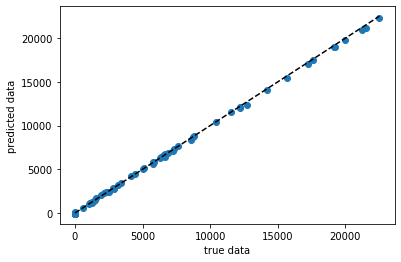

In [51]:
plt.scatter(y1_test, y1_pred)
plt.plot([y1_test.min(),y1_test.max()], [y1_test.min(),y1_test.max()], 'k--')
plt.xlabel('true data')
plt.ylabel('predicted data')

In [52]:
#y2=点击率/转化率
y2_data = raw_data.loc[:,['点击率/转化率']]
x_train, x_test, y2_train, y2_test = train_test_split(x_data, y2_data, test_size=0.25, random_state=2021)
#fit model
est2 = sm.OLS(y2_train, x_train)
est2_fit = est2.fit()
print(est2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                点击率/转化率   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     14.36
Date:                Sun, 30 May 2021   Prob (F-statistic):           8.23e-11
Time:                        14:05:25   Log-Likelihood:                -1077.1
No. Observations:                 333   AIC:                             2164.
Df Residuals:                     328   BIC:                             2183.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总费用            0.0005   7.92e-05      6.361      0.0

In [53]:
#y3=点击量/展现量
y3_data = raw_data.loc[:,['点击量/展现量']]
x_train, x_test, y3_train, y3_test = train_test_split(x_data, y3_data, test_size=0.25, random_state=2021)
#fit model
est3 = sm.OLS(y3_train, x_train)
est3_fit = est3.fit()
print(est3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                点击量/展现量   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     16.46
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.64e-12
Time:                        14:06:01   Log-Likelihood:                 541.71
No. Observations:                 333   AIC:                            -1073.
Df Residuals:                     328   BIC:                            -1054.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总费用         1.207e-06   6.13e-07      1.969      0.0

In [54]:
#y4=加购数/点击量
y4_data = raw_data.loc[:,['加购数/点击量']]
x_train, x_test, y4_train, y4_test = train_test_split(x_data, y4_data, test_size=0.25, random_state=2021)
#fit model
est4 = sm.OLS(y4_train, x_train)
est4_fit = est4.fit()
print(est4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                加购数/点击量   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.63e-12
Time:                        14:06:20   Log-Likelihood:                 229.01
No. Observations:                 333   AIC:                            -448.0
Df Residuals:                     328   BIC:                            -429.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总费用         3.745e-06   1.57e-06      2.390      0.0

In [55]:
# y5=订单数/加购数
y5_data = raw_data.loc[:,['订单数/加购数']]
x_train, x_test, y5_train, y5_test = train_test_split(x_data, y5_data, test_size=0.25, random_state=2021)
#fit model
est5 = sm.OLS(y5_train, x_train)
est5_fit = est5.fit()
print(est5_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                订单数/加购数   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.75
Date:                Sun, 30 May 2021   Prob (F-statistic):           6.22e-09
Time:                        14:06:42   Log-Likelihood:                -1060.1
No. Observations:                 333   AIC:                             2130.
Df Residuals:                     328   BIC:                             2149.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总费用            0.0004   7.52e-05      5.848      0.0